# AdaBoost

Let's try out AdaBoost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss
plt.style.use("seaborn")

## Generate 2d dataset with two classes

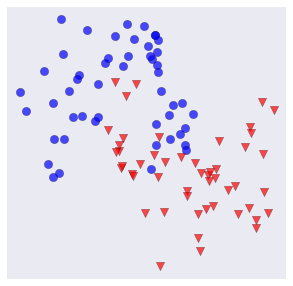

In [10]:
X,y=make_moons(n_samples=100,noise=0.3) ## make_moons generates a toy dataset, see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
_,ax=plt.subplots(figsize=(5,5))
ax.scatter(X[y==0,0],X[y==0,1],color='blue',marker='o',edgecolor='black',s=70,alpha=0.7)
ax.scatter(X[y==1,0],X[y==1,1],color='red',marker='v',edgecolor='black',s=70,alpha=0.7)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Fit AdaBoost

We only set one parameter, namely the number of weak estimators. Let's go with 10. We fit the whole set, we don't distinguish between a training set and a test set here as we just want to see how AdaBoost works.

In [3]:
ada=AdaBoostClassifier(n_estimators=10)
ada.fit(X,y)  
y_pred=ada.predict(X) # let's see how AdaBoost fits the training set

Next, we plot the decision boundary, ie which data points will be put into class 0 and which into class 1. For comparison we also plot the training set.

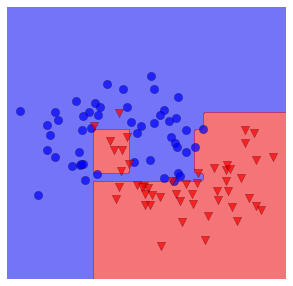

In [4]:
# this code is for the contourplot, so that we can see the decision boundary
N=100
dmin,dmax=X.min(),X.max()
xx=np.linspace(dmin-0.2,dmax+0.2,N)
yy=np.linspace(dmin-0.2,dmax+0.2,N)
XX=np.array([(u,v) for v in yy for u in xx])
Z=ada.predict(XX).reshape((N,N))

_,ax=plt.subplots(figsize=(5,5))
ax.contourf(xx,yy,Z,levels=1,alpha=0.5,colors=['blue','red'])
ax.scatter(X[y==0,0],X[y==0,1],color='blue',marker='o',edgecolor='black',s=70,alpha=0.7)
ax.scatter(X[y==1,0],X[y==1,1],color='red',marker='v',edgecolor='black',s=70,alpha=0.7)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Okay that looks complicated. Now let's look at the individual classifiers that make up AdaBoost.

## The weak learners

The class AdaBoostClassifier allows access to its individual classifiers. We can also access the predictions of only the first $k$ learners via the function staged_predict. 

In [5]:
preds=[p for p in ada.staged_predict(X)]
preds_c=[p for p in ada.staged_predict(XX)]  # this is just for the contourplot 
preds_individual=[p.predict(XX) for p in ada.estimators_] # this is just so that we can see the decision boundary of the new classifier

Misclassified points are shown with large markers


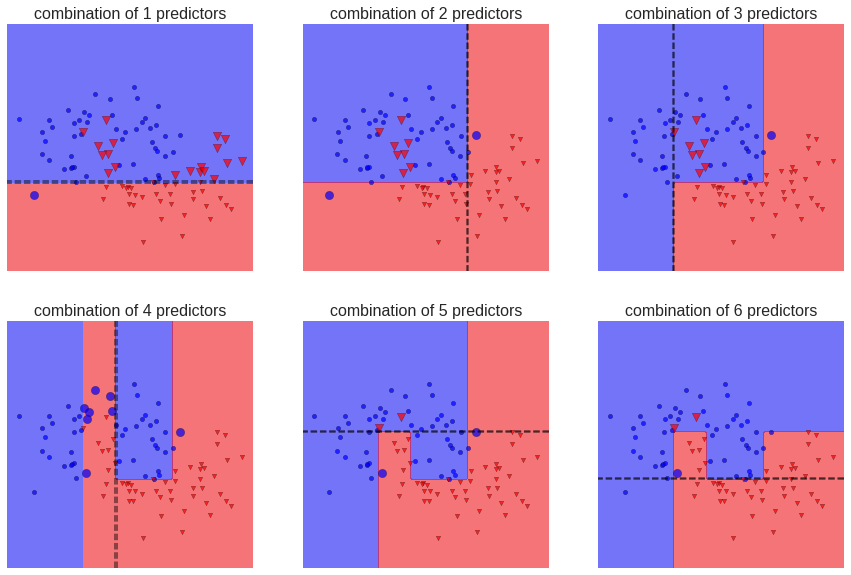

In [6]:
fig,axs=plt.subplots(2,3,figsize=(15,10))
for i,ax in enumerate(axs.flat):
    pred=preds[i]
    pred_c=preds_c[i].reshape((N,N))
    ax.contourf(xx,yy,pred_c,levels=1,alpha=0.5,colors=['blue','red'])
    ax.contour(xx,yy,preds_individual[i].reshape((N,N)),levels=1,linestyles='dashed',colors='k',alpha=0.5)
    ax.set_title('combination of {} predictors'.format(i+1),fontsize=16)
    ax.scatter(X[(y==0) & (pred!=y),0],X[(y==0) & (pred!=y),1],c='b',marker='o',edgecolor='black',cmap="rainbow",s=70,alpha=0.7)
    ax.scatter(X[(y==0) & (pred==y),0],X[(y==0) & (pred==y),1],c='b',marker='o',edgecolor='black',cmap="rainbow",s=20,alpha=0.7)
    ax.scatter(X[(y==1) & (pred!=y),0],X[(y==1) & (pred!=y),1],c='r',marker='v',edgecolor='black',cmap="rainbow",s=70,alpha=0.7)
    ax.scatter(X[(y==1) & (pred==y),0],X[(y==1) & (pred==y),1],c='r',marker='v',edgecolor='black',cmap="rainbow",s=20,alpha=0.7)
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("ada.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
print("Misclassified points are shown with large markers")

The first plot shows just one learner, and we see that it's really simple: it's just an axis-parallel half-plane. Note that several data points are misclassified. These receive more weight when the second classifier is trained. As a result, a corner can be separated off. I should point out that this implementation of AdaBoost works a little bit differently. In contrast to what I wrote in the lecture notes, here all the weak learners have the same weight. Thus, classification is via majority decision. There's also a parameter that allows to change this, so that later learners receive smaller weight. 

In [7]:
ada.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Aha, all weight are the same, ie, it's majority decision. 

In [8]:
print("training error: {:.1f}%".format(zero_one_loss(y,y_pred)*100))

training error: 2.0%


Let's also plot training error per number of learners. Not surprisingly, more learners give a better fit.

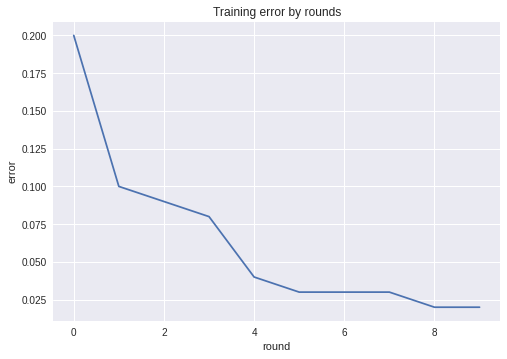

In [9]:
train_errs_by_round=[zero_one_loss(y,pred) for pred in preds]
_,ax=plt.subplots()
ax.plot(range(len(train_errs_by_round)),train_errs_by_round)
ax.set_title("Training error by rounds")
ax.set_ylabel("error")
ax.set_xlabel("round")
plt.show()